In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ab_browser_test.csv')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566134 entries, 0 to 566133
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userID            566134 non-null  int64 
 1   browser           566134 non-null  object
 2   slot              566134 non-null  object
 3   n_clicks          566134 non-null  int64 
 4   n_queries         566134 non-null  int64 
 5   n_nonclk_queries  566134 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 25.9+ MB


In [4]:
data.describe()

,userID,n_clicks,n_queries,n_nonclk_queries
count,566134.000000,566134.000000,566134.000000,566134.000000
mean,301377.214027,11.431658,10.720524,4.703987
std,175526.333101,20.251494,16.262827,8.109958
min,1.000000,0.000000,1.000000,0.000000
25%,148627.250000,1.000000,2.000000,1.000000
50%,299362.500000,4.000000,5.000000,2.000000
75%,455698.750000,13.000000,13.000000,6.000000
max,603137.000000,863.000000,665.000000,581.000000


**Задание 1.**

In [5]:
exp_clicks = data[data.slot == 'exp'].n_clicks.sum()
control_clicks = data[data.slot == 'control'].n_clicks.sum()
print(f'Clicks in exp group: {exp_clicks}')
print(f'Clicks in control group: {control_clicks}')
print(f'User clicks in exp group are {round((exp_clicks / control_clicks - 1) * 100, 3)}% more than in control group')

Clicks in exp group: 3261823
Clicks in control group: 3210027
User clicks in exp group are 1.614% more than in control group


**Задание 2.**

In [6]:
from ci_formulas import get_bootstrap_samples, stat_intervals

In [7]:
exp_clicks_data = data[data.slot == 'exp'].n_clicks
control_clicks_data = data[data.slot == 'control'].n_clicks

In [43]:
bt_exp_samples = get_bootstrap_samples(exp_clicks_data.values, 500)
bt_control_samples = get_bootstrap_samples(control_clicks_data.values, 500)

In [44]:
median_bt_confint = stat_intervals(np.median(bt_exp_samples, axis=1) - np.median(bt_control_samples, axis=1), alpha=0.05)
mean_bt_confint = stat_intervals(np.mean(bt_exp_samples, axis=1) - np.mean(bt_control_samples, axis=1), alpha=0.05)

In [45]:
print(f'''95% confidence intervals:
Median difference: {median_bt_confint}
Mean difference: {mean_bt_confint}
''')

95% confidence intervals:
Median difference: [1. 1.]
Mean difference: [0.20143266 0.40788049]



**Задание 3.**

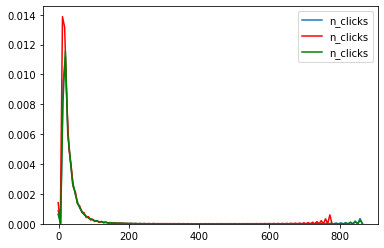

In [46]:
sns.kdeplot(data.n_clicks);
sns.kdeplot(data[data.slot == 'exp'].n_clicks, color='r')
sns.kdeplot(data[data.slot == 'control'].n_clicks, color='g');

Распределение не похоже на нормальное. Имеет очень длинный правый хвост.

**Задание 4.**

In [47]:
mean_control_bt = bt_control_samples.mean(axis=1)


In [ ]:
control_boot_chi_squared = ((mean_control_bt.reshape(-1, 1) - bt_control_samples) ** 2).sum(axis=1)

In [53]:
(mean_control_bt.reshape(-1, 1) - bt_control_samples) ** 2

array([[5.59163417e+02, 8.74854089e+01, 8.74854089e+01, ...,
        1.07192136e+02, 8.74854089e+01, 1.07192136e+02],
       [1.05717845e+02, 1.27281682e+02, 5.30263352e+01, ...,
        1.83348249e+01, 2.78986617e+01, 1.27281682e+02],
       [6.80679218e+01, 1.26569893e+02, 1.26569893e+02, ...,
        8.55685789e+01, 6.80679218e+01, 1.05069236e+02],
       ...,
       [1.05715533e+02, 8.61519210e+01, 6.85883092e+01, ...,
        1.05715533e+02, 2.95219092e+00, 1.05715533e+02],
       [3.93106710e+01, 6.83899600e+01, 8.59296045e+01, ...,
        5.15209304e+00, 2.23745816e+01, 1.05469249e+02],
       [3.97252457e+01, 1.09084658e+01, 3.97252457e+01, ...,
        4.48525326e+01, 2.46402193e+02, 4.86092501e-01]])